## Market Basket Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
items_set = pd.read_csv("./datasets/Items_sets.csv")
items_set.head()

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536540,"ROSE COTTAGE KEEPSAKE BOX,BLUE CHARLIE+LOLA PE..."
4,536541,RED HARMONICA IN BOX


In [3]:
items_set.shape

(1306, 2)

In [4]:
item_list = [item.split(",") for item in items_set.Description]

item_list

[['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  'STARS GIFT TAPE',
  'INFLATABLE POLITICAL GLOBE',
  'VINTAGE HEADS AND TAILS CARD GAME',
  'SET/2 RED RETROSPOT TEA TOWELS',
  'ROUND SNACK BOXES SET OF4 WOODLAND',
  'SPACEBOY LUNCH BOX',
  'LUNCH BOX I LOVE LONDON',
  'CIRCUS PARADE LUNCH BOX',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'RED TOADSTOOL LED NIGHT LIGHT',
  'SET 2 TEA TOWELS I LOVE LONDON',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'MINI JIGSAW CIRCUS PARADE',
  'MINI JIGSAW SPACEBOY',
  'MINI PAINT SET VINTAGE'],
 ['HAND WARMER BIRD DESIGN'],
 ['SET OF 6 T-LIGHTS SANTA',
  'ROTATING SILVER ANGELS T-LIGHT HLDR',
  'MULTI COLOUR SILVER T-LIGHT HOLDER',
  '5 HOOK HANGER MAGIC TOADSTOOL',
  '3 HOOK HANGER MAGIC GARDEN',
  '5 HOOK HANGER RED MAGIC TOADSTOOL',
  'ASSORTED COLOUR LIZARD SUCTION HOOK',
  'JUMBO BAG WOODLAND ANIMALS',
  'JUMBO BAG OWLS',
  'HOT WATER BOTTLE BABUSHKA',
  'HOMEMADE JAM SCEN

In [5]:
item_list2 = [[i.strip() for i in item] for item in item_list]
item_list2

[['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  'STARS GIFT TAPE',
  'INFLATABLE POLITICAL GLOBE',
  'VINTAGE HEADS AND TAILS CARD GAME',
  'SET/2 RED RETROSPOT TEA TOWELS',
  'ROUND SNACK BOXES SET OF4 WOODLAND',
  'SPACEBOY LUNCH BOX',
  'LUNCH BOX I LOVE LONDON',
  'CIRCUS PARADE LUNCH BOX',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'RED TOADSTOOL LED NIGHT LIGHT',
  'SET 2 TEA TOWELS I LOVE LONDON',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'MINI JIGSAW CIRCUS PARADE',
  'MINI JIGSAW SPACEBOY',
  'MINI PAINT SET VINTAGE'],
 ['HAND WARMER BIRD DESIGN'],
 ['SET OF 6 T-LIGHTS SANTA',
  'ROTATING SILVER ANGELS T-LIGHT HLDR',
  'MULTI COLOUR SILVER T-LIGHT HOLDER',
  '5 HOOK HANGER MAGIC TOADSTOOL',
  '3 HOOK HANGER MAGIC GARDEN',
  '5 HOOK HANGER RED MAGIC TOADSTOOL',
  'ASSORTED COLOUR LIZARD SUCTION HOOK',
  'JUMBO BAG WOODLAND ANIMALS',
  'JUMBO BAG OWLS',
  'HOT WATER BOTTLE BABUSHKA',
  'HOMEMADE JAM SCEN

In [6]:
te = TransactionEncoder()

te_encoded = te.fit(item_list2).transform(item_list2)

te_encoded

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [7]:
items_data = pd.DataFrame(te_encoded, columns = te.columns_)

items_data

,,1 HANGER,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1303,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1304,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
items_data[""].value_counts()


False    1273
True       33
Name: count, dtype: int64

In [9]:
items_data.drop("",inplace=True, axis=1)

In [10]:
items_data.shape

(1306, 2705)

In [11]:
spaceboy_dolly = items_data[(items_data["SPACEBOY LUNCH BOX"] == True) & 
                         (items_data["DOLLY GIRL LUNCH BOX"] == True)]

print(spaceboy_dolly[["SPACEBOY LUNCH BOX", "DOLLY GIRL LUNCH BOX"]].size)
spaceboy_dolly[["SPACEBOY LUNCH BOX", "DOLLY GIRL LUNCH BOX"]].head()

134


,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX
87,True,True
108,True,True
109,True,True
119,True,True
120,True,True


In [12]:
Round_wa_Plasters_wa = items_data[(items_data["ROUND SNACK BOXES SET OF4 WOODLAND"] == True) & 
                         (items_data["PLASTERS IN TIN WOODLAND ANIMALS"] == True)]

print(Round_wa_Plasters_wa[["ROUND SNACK BOXES SET OF4 WOODLAND", "PLASTERS IN TIN WOODLAND ANIMALS"]].size)
Round_wa_Plasters_wa[["ROUND SNACK BOXES SET OF4 WOODLAND", "PLASTERS IN TIN WOODLAND ANIMALS"]].head()

130


,ROUND SNACK BOXES SET OF4 WOODLAND,PLASTERS IN TIN WOODLAND ANIMALS
16,True,True
25,True,True
39,True,True
50,True,True
75,True,True


In [13]:
pd.set_option('display.max_colwidth', None)

In [14]:
frequent_items = apriori(items_data, min_support=0.1, use_colnames = True)
frequent_items

,support,itemsets
0,0.103369,(PACK OF 72 RETROSPOT CAKE CASES)
1,0.112557,(PLASTERS IN TIN CIRCUS PARADE)
2,0.118683,(PLASTERS IN TIN WOODLAND ANIMALS)
3,0.103369,(RED TOADSTOOL LED NIGHT LIGHT)
4,0.163859,(REGENCY CAKESTAND 3 TIER)
5,0.104135,(ROUND SNACK BOXES SET OF 4 FRUITS)
6,0.163093,(ROUND SNACK BOXES SET OF4 WOODLAND)
7,0.110260,(SPACEBOY LUNCH BOX)


In [15]:
frequent_items.sort_values("support", ascending = False)

,support,itemsets
4,0.163859,(REGENCY CAKESTAND 3 TIER)
6,0.163093,(ROUND SNACK BOXES SET OF4 WOODLAND)
2,0.118683,(PLASTERS IN TIN WOODLAND ANIMALS)
1,0.112557,(PLASTERS IN TIN CIRCUS PARADE)
7,0.110260,(SPACEBOY LUNCH BOX)
5,0.104135,(ROUND SNACK BOXES SET OF 4 FRUITS)
0,0.103369,(PACK OF 72 RETROSPOT CAKE CASES)
3,0.103369,(RED TOADSTOOL LED NIGHT LIGHT)


In [16]:
frequent_items = apriori(items_data, min_support = 0.05, use_colnames = True)

frequent_items.sort_values("support", ascending = False)

,support,itemsets
32,0.163859,(REGENCY CAKESTAND 3 TIER)
36,0.163093,(ROUND SNACK BOXES SET OF4 WOODLAND)
26,0.118683,(PLASTERS IN TIN WOODLAND ANIMALS)
23,0.112557,(PLASTERS IN TIN CIRCUS PARADE)
44,0.110260,(SPACEBOY LUNCH BOX)
35,0.104135,(ROUND SNACK BOXES SET OF 4 FRUITS)
31,0.103369,(RED TOADSTOOL LED NIGHT LIGHT)
22,0.103369,(PACK OF 72 RETROSPOT CAKE CASES)
24,0.091118,(PLASTERS IN TIN SPACEBOY)
27,0.087289,(RABBIT NIGHT LIGHT)


In [17]:
frequent_items = apriori(items_data, min_support = 0.02, use_colnames = True)

frequent_items.sort_values("support", ascending = False)

,support,itemsets
187,0.163859,(REGENCY CAKESTAND 3 TIER)
204,0.163093,(ROUND SNACK BOXES SET OF4 WOODLAND)
156,0.118683,(PLASTERS IN TIN WOODLAND ANIMALS)
151,0.112557,(PLASTERS IN TIN CIRCUS PARADE)
258,0.110260,(SPACEBOY LUNCH BOX)
...,...,...
200,0.020674,(ROSE COTTAGE KEEPSAKE BOX)
393,0.020674,"(RED RETROSPOT MINI CASES, PLASTERS IN TIN CIRCUS PARADE)"
389,0.020674,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TIN SKULLS)"
384,0.020674,"(PACK OF 72 RETROSPOT CAKE CASES, PACK OF 72 SKULL CAKE CASES)"


In [53]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.02)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(6 RIBBONS RUSTIC CHARM),(REGENCY CAKESTAND 3 TIER),0.063553,0.163859,0.022971,0.361446,2.205833,0.012557,1.309428,0.583756
1,(REGENCY CAKESTAND 3 TIER),(6 RIBBONS RUSTIC CHARM),0.163859,0.063553,0.022971,0.140187,2.205833,0.012557,1.089129,0.653785
2,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.103369,0.035988,0.021440,0.207407,5.763278,0.017719,1.216277,0.921770
3,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.035988,0.103369,0.021440,0.595745,5.763278,0.017719,2.217982,0.857341
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.073507,0.053599,0.034456,0.468750,8.745536,0.030516,1.781461,0.955923
...,...,...,...,...,...,...,...,...,...,...
483,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.042879,0.065850,0.041348,0.964286,14.643688,0.038524,26.156202,0.973452
484,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",(SET/20 RED RETROSPOT PAPER NAPKINS),0.058193,0.082695,0.041348,0.710526,8.592105,0.036535,3.168871,0.938211
485,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",0.082695,0.058193,0.041348,0.500000,8.592105,0.036535,1.883614,0.963272
486,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)",0.065850,0.042879,0.041348,0.627907,14.643688,0.038524,2.572263,0.997389


In [19]:
assoc_rules.sort_values(by= 'support', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.163093,0.104135,0.078101,0.478873,4.598592,0.061117,1.719093,0.935041
7,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.104135,0.163093,0.078101,0.750000,4.598592,0.061117,3.347626,0.873504
2,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.118683,0.112557,0.062021,0.522581,4.642791,0.048663,1.858832,0.890273
3,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.112557,0.118683,0.062021,0.551020,4.642791,0.048663,1.962933,0.884127
4,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.118683,0.091118,0.061256,0.516129,5.664408,0.050442,1.878356,0.934351


In [22]:
assoc_rules = association_rules(frequent_items, metric = "confidence", min_threshold = 0.8)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT),0.026799,0.069678,0.022971,0.857143,12.301413,0.021104,6.512251,0.944007
1,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.047473,0.046708,0.039051,0.822581,17.611317,0.036833,5.373103,0.990228
2,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.046708,0.047473,0.039051,0.836066,17.611317,0.036833,5.810413,0.989432
3,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.029096,0.030628,0.026034,0.894737,29.213158,0.025143,9.209035,0.994711
4,(DOLLY GIRL CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.030628,0.029096,0.026034,0.850000,29.213158,0.025143,6.472690,0.996283
5,(DOLLY GIRL CHILDRENS BOWL),(SPACEBOY CHILDRENS BOWL),0.030628,0.039816,0.026034,0.850000,21.348077,0.024814,6.401225,0.983273
6,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.033691,0.043645,0.031394,0.931818,21.350080,0.029923,14.026544,0.986394
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.043645,0.057427,0.035222,0.807018,14.052865,0.032716,4.884241,0.971229
8,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.022971,0.035988,0.021440,0.933333,25.934752,0.020613,14.460184,0.984046
9,(JUMBO BAG PEARS),(JUMBO BAG APPLES),0.026799,0.052067,0.021440,0.800000,15.364706,0.020044,4.739663,0.960661


In [34]:
assoc_rules = association_rules(frequent_items, metric = "lift", min_threshold = 10)

assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.053599,0.061256,0.037519,0.700000,11.427500,0.034236,3.129148,0.964170
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.061256,0.053599,0.037519,0.612500,11.427500,0.034236,2.442326,0.972034
2,(BAKING SET 9 PIECE RETROSPOT),(BAKING SET SPACEBOY DESIGN),0.069678,0.026799,0.022971,0.329670,12.301413,0.021104,1.451824,0.987517
3,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT),0.026799,0.069678,0.022971,0.857143,12.301413,0.021104,6.512251,0.944007
4,(RED RETROSPOT CUP),(BLUE POLKADOT CUP),0.045942,0.032925,0.021440,0.466667,14.173643,0.019927,1.813266,0.974203
...,...,...,...,...,...,...,...,...,...,...
97,(PLASTERS IN TIN SPACEBOY),"(PLASTERS IN TIN WOODLAND ANIMALS, LUNCH BAG SPACEBOY DESIGN)",0.091118,0.022205,0.020674,0.226891,10.217908,0.018651,1.264756,0.992574
98,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER PLATES)",(SET/6 RED SPOTTY PAPER CUPS),0.045942,0.065850,0.041348,0.900000,13.667442,0.038322,9.341501,0.971464
99,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.042879,0.065850,0.041348,0.964286,14.643688,0.038524,26.156202,0.973452
100,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)",0.065850,0.042879,0.041348,0.627907,14.643688,0.038524,2.572263,0.997389


In [30]:
assoc_rules[(assoc_rules["confidence"] >= 0.8) & (assoc_rules["lift"] >= 20)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.022205,0.030628,0.022205,1.000000,32.650000,0.021525,inf,0.991386
5,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN),0.022205,0.026034,0.020674,0.931034,35.762677,0.020096,14.122511,0.994112
0,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.029096,0.030628,0.026034,0.894737,29.213158,0.025143,9.209035,0.994711
7,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.026034,0.029096,0.022205,0.852941,29.314241,0.021448,6.602144,0.991705
1,(DOLLY GIRL CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.030628,0.029096,0.026034,0.850000,29.213158,0.025143,6.472690,0.996283
2,(PACK OF 20 SKULL PAPER NAPKINS),(PACK OF 6 SKULL PAPER PLATES),0.026034,0.028331,0.021440,0.823529,29.068362,0.020702,5.506126,0.991408


#### * Visualizing where the items for support and confidence we can see that there are some items which are having low support and confidence and there are some items the are having low support but confidence and there are some items having high support and confidence and is categorizing according to lift 
#### * Also high lift have a relatively low support

Text(0, 0.5, 'Confidence')

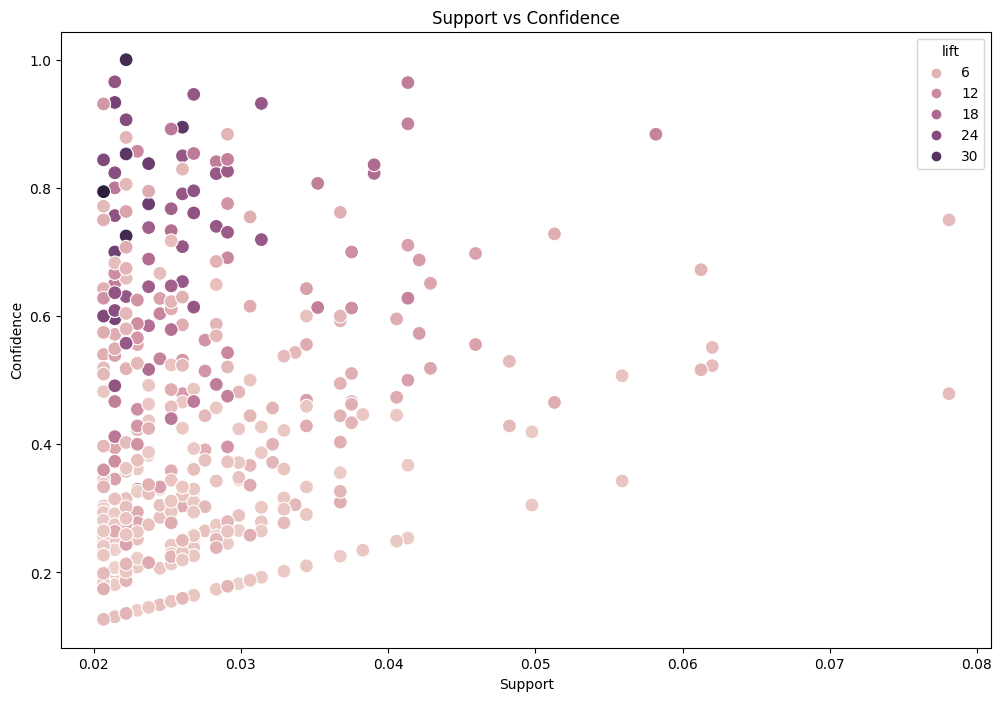

In [54]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = assoc_rules["support"], 
                y = assoc_rules["confidence"], 
                hue = assoc_rules["lift"], s = 100)
        
plt.title("Support vs Confidence")

plt.xlabel("Support")
plt.ylabel("Confidence")

In [40]:
assoc_rules[assoc_rules["antecedents"] == {"ROUND SNACK BOXES SET OF4 WOODLAND"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(10 COLOUR SPACEBOY PEN),0.163093,0.026799,0.011485,0.070423,2.627767,0.007115,1.046928,0.740165
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(3 HOOK HANGER MAGIC GARDEN),0.163093,0.019142,0.011485,0.070423,3.678873,0.008363,1.055165,0.870082
10,(ROUND SNACK BOXES SET OF4 WOODLAND),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.163093,0.034456,0.014548,0.089202,2.588837,0.008929,1.060107,0.733327
39,(ROUND SNACK BOXES SET OF4 WOODLAND),(6 RIBBONS RUSTIC CHARM),0.163093,0.063553,0.016080,0.098592,1.551332,0.005715,1.038871,0.424650
86,(ROUND SNACK BOXES SET OF4 WOODLAND),(ALARM CLOCK BAKELIKE GREEN),0.163093,0.053599,0.019908,0.122066,2.277398,0.011167,1.077986,0.670209
...,...,...,...,...,...,...,...,...,...,...
7392,(ROUND SNACK BOXES SET OF4 WOODLAND),"(PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS IN TIN SPACEBOY)",0.163093,0.019908,0.015314,0.093897,4.716504,0.012067,1.081656,0.941537
7406,(ROUND SNACK BOXES SET OF4 WOODLAND),"(PLASTERS IN TIN WOODLAND ANIMALS, SPACEBOY LUNCH BOX, PLASTERS IN TIN SPACEBOY)",0.163093,0.022205,0.013783,0.084507,3.805731,0.010161,1.068053,0.880909
7421,(ROUND SNACK BOXES SET OF4 WOODLAND),"(PLASTERS IN TIN STRONGMAN, ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS IN TIN WOODLAND ANIMALS)",0.163093,0.013017,0.010720,0.065728,5.049434,0.008597,1.056419,0.958241
7451,(ROUND SNACK BOXES SET OF4 WOODLAND),"(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXES SET OF 4 FRUITS)",0.163093,0.012251,0.010720,0.065728,5.365023,0.008722,1.057239,0.972161


In [41]:
assoc_rules[assoc_rules["consequents"] == {"PLASTERS IN TIN WOODLAND ANIMALS"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(6 RIBBONS RUSTIC CHARM),(PLASTERS IN TIN WOODLAND ANIMALS),0.063553,0.118683,0.012251,0.192771,1.624252,0.004709,1.091781,0.410415
83,(ALARM CLOCK BAKELIKE GREEN),(PLASTERS IN TIN WOODLAND ANIMALS),0.053599,0.118683,0.013017,0.242857,2.046267,0.006656,1.164004,0.540263
116,(ALARM CLOCK BAKELIKE PINK),(PLASTERS IN TIN WOODLAND ANIMALS),0.073507,0.118683,0.019142,0.260417,2.194220,0.010418,1.191640,0.587438
133,(ALARM CLOCK BAKELIKE RED),(PLASTERS IN TIN WOODLAND ANIMALS),0.061256,0.118683,0.013017,0.212500,1.790484,0.005747,1.119133,0.470300
177,(BAKING SET 9 PIECE RETROSPOT),(PLASTERS IN TIN WOODLAND ANIMALS),0.069678,0.118683,0.014548,0.208791,1.759234,0.006279,1.113887,0.463894
...,...,...,...,...,...,...,...,...,...,...
7368,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF 4 FRUITS)",(PLASTERS IN TIN WOODLAND ANIMALS),0.026034,0.118683,0.017611,0.676471,5.699810,0.014521,2.724071,0.846596
7383,"(ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS IN TIN SPACEBOY)",(PLASTERS IN TIN WOODLAND ANIMALS),0.020674,0.118683,0.015314,0.740741,6.241338,0.012860,3.399366,0.857506
7398,"(ROUND SNACK BOXES SET OF4 WOODLAND, SPACEBOY LUNCH BOX, PLASTERS IN TIN SPACEBOY)",(PLASTERS IN TIN WOODLAND ANIMALS),0.019142,0.118683,0.013783,0.720000,6.066581,0.011511,3.147561,0.851462
7410,"(PLASTERS IN TIN STRONGMAN, ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNACK BOXES SET OF4 WOODLAND)",(PLASTERS IN TIN WOODLAND ANIMALS),0.013017,0.118683,0.010720,0.823529,6.938899,0.009175,4.994130,0.867173


In [38]:
frequent_items = apriori(items_data, min_support = 0.01, use_colnames = True)

frequent_items

,support,itemsets
0,0.026799,(10 COLOUR SPACEBOY PEN)
1,0.015314,(12 PENCIL SMALL TUBE WOODLAND)
2,0.011485,(12 PENCILS SMALL TUBE RED RETROSPOT)
3,0.013783,(12 PENCILS TALL TUBE RED RETROSPOT)
4,0.016080,(12 PENCILS TALL TUBE WOODLAND)
...,...,...
2595,0.010720,"(REGENCY TEA PLATE ROSES, GREEN REGENCY TEACUP AND SAUCER, REGENCY TEA PLATE PINK, ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER, REGENCY TEA PLATE GREEN)"
2596,0.010720,"(REGENCY TEA PLATE ROSES, GREEN REGENCY TEACUP AND SAUCER, REGENCY TEA PLATE PINK, REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACUP AND SAUCER, REGENCY TEA PLATE GREEN)"
2597,0.010720,"(PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 20 SKULL PAPER NAPKINS)"
2598,0.011485,"(REGENCY TEA PLATE ROSES, REGENCY TEA PLATE PINK, REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER, REGENCY TEA PLATE GREEN)"


In [46]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.01)

assoc_rules.sort_values("support", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2165,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.104135,0.163093,0.078101,0.750000,4.598592,0.061117,3.347626,0.873504
2164,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.163093,0.104135,0.078101,0.478873,4.598592,0.061117,1.719093,0.935041
1651,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.112557,0.118683,0.062021,0.551020,4.642791,0.048663,1.962933,0.884127
1650,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.118683,0.112557,0.062021,0.522581,4.642791,0.048663,1.858832,0.890273
1715,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.091118,0.118683,0.061256,0.672269,5.664408,0.050442,2.689147,0.906013
...,...,...,...,...,...,...,...,...,...,...
5962,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACUP AND SAUCER)","(REGENCY MILK JUG PINK, PINK REGENCY TEACUP AND SAUCER)",0.028331,0.016080,0.010720,0.378378,23.531532,0.010264,1.582828,0.985422
5963,"(REGENCY MILK JUG PINK, GREEN REGENCY TEACUP AND SAUCER)","(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP AND SAUCER)",0.018377,0.022205,0.010720,0.583333,26.270115,0.010312,2.346708,0.979942
5964,(PINK REGENCY TEACUP AND SAUCER),"(REGENCY CAKESTAND 3 TIER, REGENCY MILK JUG PINK, GREEN REGENCY TEACUP AND SAUCER)",0.033691,0.013017,0.010720,0.318182,24.443850,0.010281,1.447575,0.992529
5965,(REGENCY CAKESTAND 3 TIER),"(REGENCY MILK JUG PINK, PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",0.163859,0.014548,0.010720,0.065421,4.496803,0.008336,1.054433,0.930010


In [42]:
round_snack_boxes_antecedent = assoc_rules[assoc_rules["antecedents"] == {"ROUND SNACK BOXES SET OF4 WOODLAND"}]

round_snack_boxes_antecedent = round_snack_boxes_antecedent.sort_values("support", ascending = False).head(5)

round_snack_boxes_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2164,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.163093,0.104135,0.078101,0.478873,4.598592,0.061117,1.719093,0.935041
2212,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.163093,0.110260,0.055896,0.342723,3.108307,0.037913,1.353675,0.810463
1804,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.163093,0.118683,0.049770,0.305164,2.571255,0.030414,1.268382,0.730171
1670,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN CIRCUS PARADE),0.163093,0.112557,0.041348,0.253521,2.252371,0.022990,1.188838,0.664379
1734,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN SPACEBOY),0.163093,0.091118,0.040582,0.248826,2.730816,0.025721,1.209949,0.757324


Text(0, 0.5, 'Recommended Items')

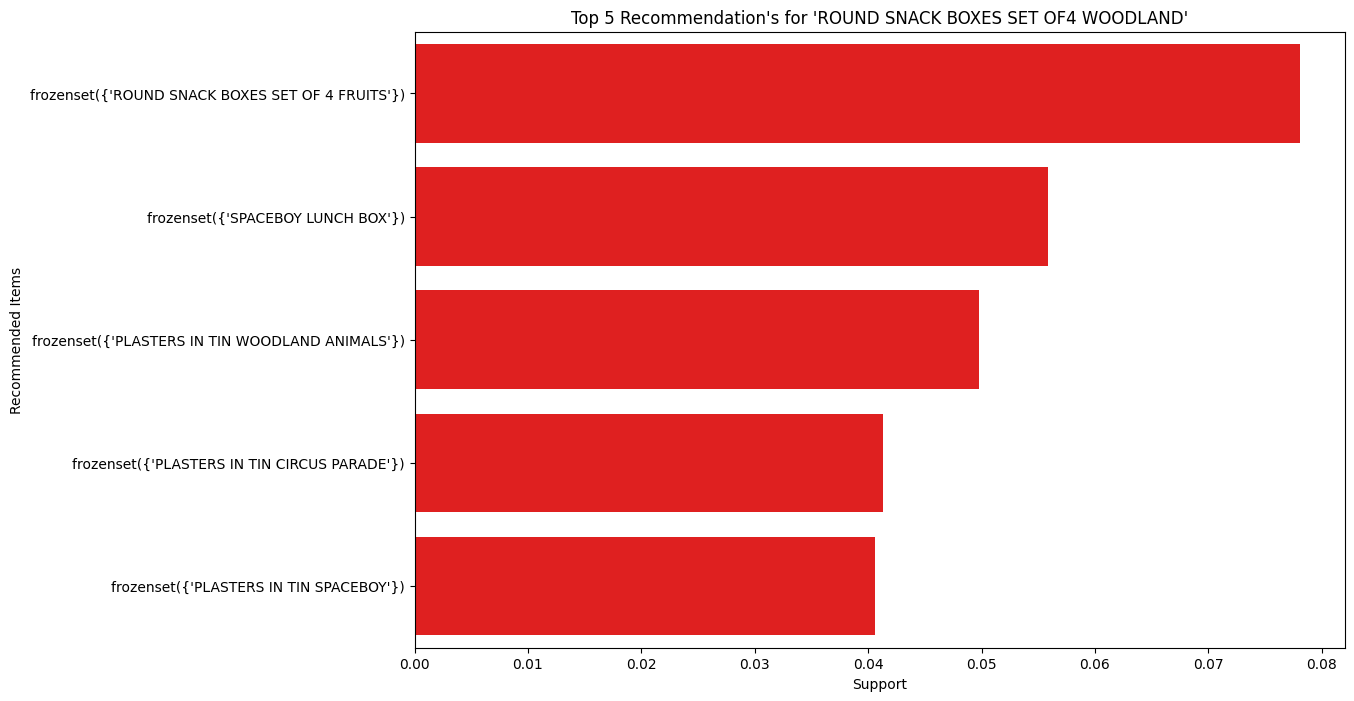

In [43]:
plt.figure(figsize = [12, 8])

x = sns.barplot(x = "support", y = "consequents", data = round_snack_boxes_antecedent, color = "red")

plt.title("Top 5 Recommendation's for 'ROUND SNACK BOXES SET OF4 WOODLAND'")
plt.xlabel("Support")
plt.ylabel("Recommended Items")